In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import cv2
from PIL import Image

from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog
from scripts.is_model_inference import *

In [3]:
ANNOTATIONS_DIR = 'data/annotations'
IMAGES_DIR = 'data/images'
MODEL_DIR = 'models'
MODEL_NAME = 'model_final.pth'

In [ ]:
# Load COCO data and splits
with open('data/annotations/dataset.json', 'r') as f:
    coco_data = json.load(f)
class_names = [x['name'] for x in coco_data['categories']]

with open('data/split_mapping.json', 'r') as f:
    splits = json.load(f)

coco_data['categories']

# Register datasets
annotations_file = os.path.join(ANNOTATIONS_DIR, 'dataset.json')
register_coco_instances('all_data_for_metadata', {}, annotations_file, IMAGES_DIR)
dataset_dicts = DatasetCatalog.get('all_data_for_metadata')
metadata = MetadataCatalog.get('all_data_for_metadata')

# Setup model
model_file_path = os.path.join(MODEL_DIR, MODEL_NAME)
num_classes = len(class_names)
predictor = setup_predictor(model_file_path, num_classes) # threshold=0.8


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



TypeError: setup_predictor() got an unexpected keyword argument 'threshold'

In [ ]:
coco_data['categories']

NameError: name 'coco_data' is not defined

In [5]:
features_df = pd.read_csv('data/processed/image_features.csv')
features_df

,intersection_total_count,crosswalk_total_count,median_total_count,doubleYellow_total_count,bikeLane_total_count,bikeLaneInt_total_count,overpass_total_count,busLane_total_count,crosswalk_main_count,median_main_count,...,intersection_main_area,cw_side1_length,cw_side1_width,cw_side2_length,cw_side2_width,cw_side3_length,cw_side3_width,cw_side4_length,cw_side4_width,overpass_center
0,0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,0,0,0,2,0,0,2,0,...,44412.0,200.352190,66.917162,0.000000,0.000000,196.840037,56.934556,0.000000,0.000000,NaN
3,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2,0,0,0,0,0,0,2,0,...,37101.0,0.000000,0.000000,206.968597,51.862940,0.000000,0.000000,208.751048,62.447591,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39158,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39159,1,2,0,0,0,0,0,0,2,0,...,44296.0,197.648678,61.199499,0.000000,0.000000,200.449495,53.429918,0.000000,0.000000,NaN
39160,1,1,0,0,0,0,0,0,1,0,...,17221.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.341180,42.923684,NaN
39161,1,3,0,5,1,0,0,0,3,0,...,83131.0,324.422564,59.123508,222.524156,90.826094,332.866340,44.882880,0.000000,0.000000,NaN


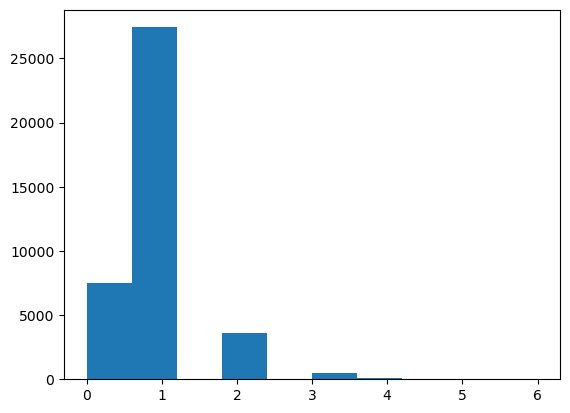

intersection_total_count
1    27421
0     7531
2     3620
3      497
4       82
5       11
6        1
Name: count, dtype: int64

In [6]:
plt.figure()
plt.hist(features_df['intersection_total_count'])
plt.show()

counts = features_df['intersection_total_count'].value_counts()
display(counts)

In [7]:
features_df[features_df.intersection_total_count > 3][['image_name', 'intersection_total_count']]

,image_name,intersection_total_count
513,40.536298_-74.147529,4
841,40.544209_-74.141042,4
1027,40.549106_-74.180462,4
1100,40.550818_-74.150106,4
2546,40.580689_-73.965945,4
...,...,...
35801,40.841189_-73.842925,4
36510,40.848837_-73.867419,4
37547,40.865373_-73.862583,4
37653,40.867552_-73.861503,4


40.867782_-73.861498.png


{'intersection_total_count': 4,
 'crosswalk_total_count': 6,
 'median_total_count': 0,
 'doubleYellow_total_count': 2,
 'bikeLane_total_count': 0,
 'bikeLaneInt_total_count': 0,
 'overpass_total_count': 0,
 'busLane_total_count': 0,
 'crosswalk_main_count': 4,
 'median_main_count': 0,
 'doubleYellow_main_count': 1,
 'bikeLane_main_count': 0,
 'bikeLaneInt_main_count': 0,
 'overpass_main_count': 0,
 'busLane_main_count': 0,
 'overhead_area': 0.0,
 'overpass_area': 0.0,
 'int_side1_length': 350.5153348999156,
 'int_side2_length': 230.4256930118688,
 'int_side3_length': 362.08838699963854,
 'int_side4_length': 241.0082986123092,
 'intersection_main_area': 100267,
 'cw_side1_length': 329.1230772826482,
 'cw_side1_width': 71.87888553826193,
 'cw_side2_length': 247.759964481754,
 'cw_side2_width': 41.36665107067681,
 'cw_side3_length': 324.39482116704636,
 'cw_side3_width': 56.523713707987696,
 'cw_side4_length': 248.50150904974402,
 'cw_side4_width': 67.40804135980859}

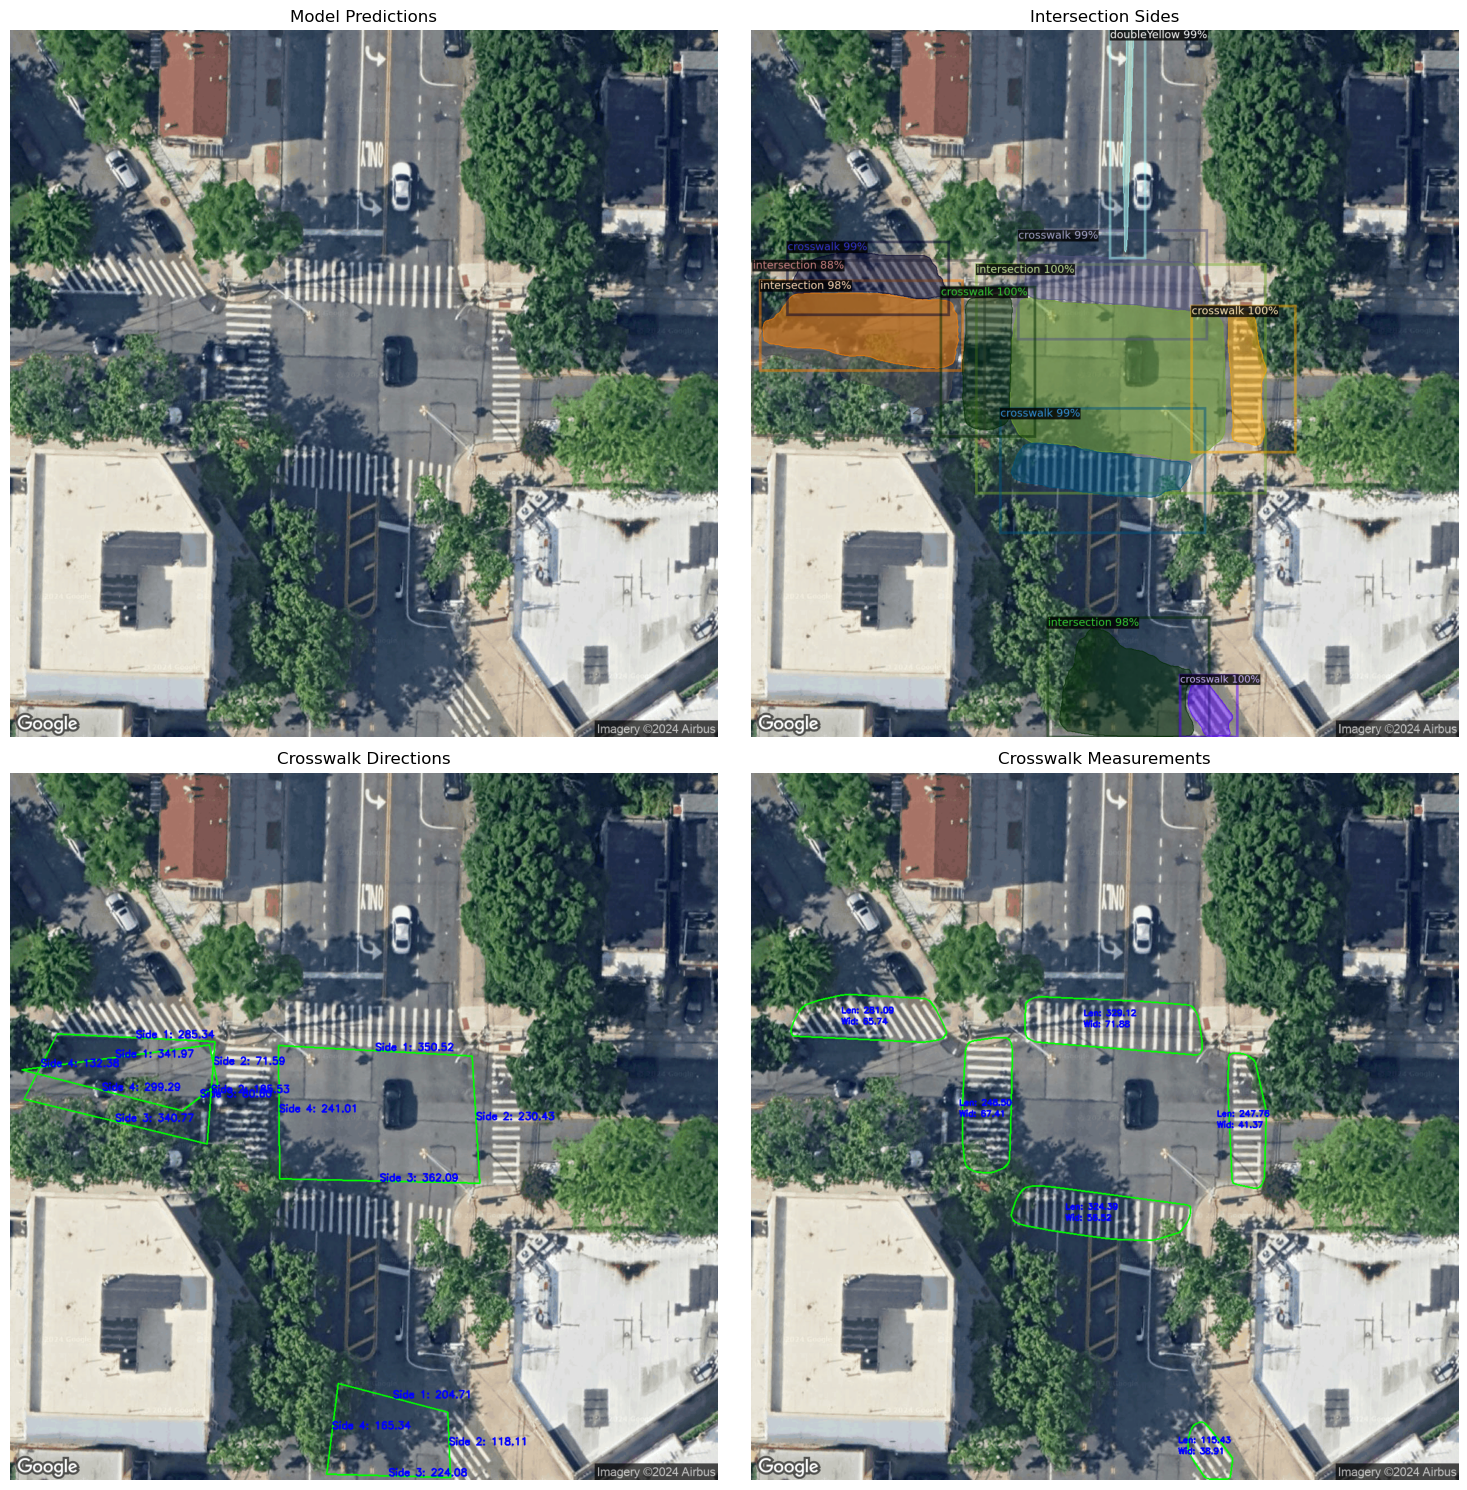

In [14]:
image_name = '40.867782_-73.861498.png'
image_file_path = os.path.join(IMAGES_DIR, image_name)
image = cv2.imread(image_file_path)
predictions = predictor(image)
features = extract_features(image_file_path, predictions, class_names)

print(image_name)
display(features)
visualize_all_in_grid(image_file_path, predictor, metadata, None, class_names, fit_polygon_delaunay)